In [1]:
import  pandas as  pd
import  numpy as  np
import  matplotlib.pyplot  as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
# read Excel file
xl = pd.ExcelFile('C:/Users/Assa/git/2017 data-vysledky.xlsx ')


# prepare polutants to dictionary fields
dic_pandas_sheets={}
for i in xl.sheet_names:
    dic_pandas_sheets[i]=xl.parse(i)
    dic_pandas_sheets[i]=dic_pandas_sheets[i][:365] 
    dic_pandas_sheets[i].index = pd.to_datetime(dic_pandas_sheets['24-pm2,5']['dtvalue'])
    dic_pandas_sheets[i]=dic_pandas_sheets[i].replace(0.0, np.nan)
    

In [4]:
def carymarygrafy(k,y_lim,umiest_legendy,povolene_max):
    dic_coef1={10:'BTX',6:'NO2',4:'O3',8:'SO2', 0:'PM25', 2:'PM10'}
    np_y_lim=int(y_lim+1)
    podiel=int(y_lim/5)
    i=xl.sheet_names[k]
    i2=xl.sheet_names[k+1]
#pocet=int(dic_pandas_sheets[i].columns.shape[0]/2-1.1)
#plt.rcParams['figure.figsize'] = 20,60
#fig, axarr = plt.subplots()
#plt.ylim(0,350) 
    pocet=int(dic_pandas_sheets[i].columns.shape[0]-0.1)
    for s in range(0,int(np.floor(pocet/10))+1):
        kk = int(np.ceil((pocet-s*10)/2))
        if kk>=5 :
            n_rows=5
            plt.rcParams['figure.figsize'] = 8.27,11.69/5*n_rows
            fig, axarr = plt.subplots(n_rows, 2, sharex=True, sharey=True)
            print(s,kk,n_rows)
            for j in range(s*5,s*5+n_rows):
                plotindex= j-s*5
                for col in [0,1]:
                    axarr[plotindex, col].fill_between(dic_pandas_sheets[i].index,0, dic_pandas_sheets[i][dic_pandas_sheets[i].columns[2*j+1+col]],label='{} priemerné denné koncentrácie'.format(i2[:-4]))
                    axarr[plotindex, col].plot(dic_pandas_sheets[i2].index, dic_pandas_sheets[i2][dic_pandas_sheets[i2].columns[2*j+1+col]],'-', linewidth=0.5 ,color='black',label='{} maximálne 1hod koncentrácie'.format(i2[:-4]))
                    axarr[plotindex, col].set_title(dic_pandas_sheets[i].columns[2*j+1+col],fontsize=10,fontweight='bold')
                    axarr[plotindex, col].grid("on",linestyle='--')
                    axarr[plotindex, col].xaxis.grid()
                    axarr[plotindex, col].plot(dic_pandas_sheets[i2].index, np.full((365,),povolene_max),'-', linewidth=0.5 ,color='red',label='{} maximálne povolené koncentrácie'.format(i2[:-4]))
                axarr[plotindex,0].set_yticks(np.arange(0,np_y_lim,podiel))
                axarr[plotindex,0].set_yticklabels(np.arange(0,np_y_lim,podiel),fontsize=9)
                axarr[plotindex,0].set_ylim([0,y_lim])
                axarr[plotindex,0].set_xticks([e for e in dic_pandas_sheets[i2].index if e.day==1])
                axarr[plotindex,0].set_xticklabels(['I','II','III','IV','V','VI','VII','VIII','IX','X','XI','XII'],fontsize=10)
                axarr[plotindex,0].set_xlim([dic_pandas_sheets[i2].index[0],dic_pandas_sheets[i2].index[-1]])
            blue_patch = mpatches.Patch(color='steelblue', label='priemerné denné koncentrácie [µg/m³]           ')
            black_line = mlines.Line2D([], [], color='k',linewidth=0.5
                              , label='maximálne denne koncentrácie [µg/m³]')    
            red_line = mlines.Line2D([], [], color='r',linewidth=0.5
                              , label='maximálne povolené denne koncentrácie [µg/m³]') 
            fig.legend(handles=[blue_patch,black_line,red_line] , loc =3, bbox_to_anchor=(0.042, 0.02), fontsize=10, ncol=2)
            plt.tight_layout(h_pad=1.2, rect=(0,0.0799,1,1))
             #tu zmeniť diretory na ukaldanie
            plt.savefig('C:/Users/Assa/Documents/Assa/SHMU/domaca_uloha/rocenka_obrazky/{0}{1}'.format(s,dic_coef1[k]), dpi=300)
            plt.show()
            plt.close()
        
        
        else:
            n_rows=kk
            plt.rcParams['figure.figsize'] = 8.27,3
            fig, axarr = plt.subplots(n_rows, 2, sharex=True, sharey=True)
            print(s,kk,n_rows,pocet)
            if n_rows==1:

                if pocet%2==0:
                    for j in range(s*5,s*5+n_rows):
                        for col in [0,1]:
                            plotindex= j-s*5+col
                            axarr[plotindex].fill_between(dic_pandas_sheets[i].index,0, dic_pandas_sheets[i][dic_pandas_sheets[i].columns[2*j+1+col]],label='{} priemerné denné koncentrácie'.format(i2[:-4]))
                            axarr[plotindex].plot(dic_pandas_sheets[i2].index, dic_pandas_sheets[i2][dic_pandas_sheets[i2].columns[2*j+1+col]],'-', linewidth=0.5 ,color='black',label='{} maximálne 1hod koncentrácie'.format(i2[:-4]))
                            axarr[plotindex].set_title(dic_pandas_sheets[i].columns[2*j+1+col],fontsize=10,fontweight='bold')
                            axarr[plotindex].grid("on",linestyle='--')
                            axarr[plotindex].xaxis.grid()
                            axarr[plotindex].plot(dic_pandas_sheets[i2].index, np.full((365,),povolene_max),'-', linewidth=0.5 ,color='red',label='{} maximálne povolené koncentrácie'.format(i2[:-4]))
                        axarr[plotindex].set_yticks(np.arange(0,np_y_lim,podiel))
                        axarr[plotindex].set_yticklabels(np.arange(0,np_y_lim,podiel),fontsize=9)
                        axarr[plotindex].set_ylim([0,y_lim])
                        axarr[plotindex].set_xticks([e for e in dic_pandas_sheets[i2].index if e.day==1])
                        axarr[plotindex].set_xticklabels(['I','II','III','IV','V','VI','VII','VIII','IX','X','XI','XII'],fontsize=10)
                        axarr[plotindex].set_xlim([dic_pandas_sheets[i2].index[0],dic_pandas_sheets[i2].index[-1]])
                #pripad ked mam neprne grafy
                else:
                   for j in range(s*5,s*5+n_rows):
                       plotindex= j-s*5
                       axarr[plotindex].fill_between(dic_pandas_sheets[i].index,0, dic_pandas_sheets[i][dic_pandas_sheets[i].columns[2*j+1]],label='{} priemerné denné koncentrácie'.format(i2[:-4]))
                       axarr[plotindex].plot(dic_pandas_sheets[i2].index, dic_pandas_sheets[i2][dic_pandas_sheets[i2].columns[2*j+1]],'-', linewidth=0.5 ,color='black',label='{} maximálne 1hod koncentrácie'.format(i2[:-4]))
                       axarr[plotindex].set_title(dic_pandas_sheets[i].columns[2*j+1],fontsize=10,fontweight='bold')
                       axarr[plotindex].grid("on",linestyle='--')
                       axarr[plotindex].xaxis.grid()
                       axarr[plotindex].plot(dic_pandas_sheets[i2].index, np.full((365,),povolene_max),'-', linewidth=0.5 ,color='red',label='{} maximálne povolené koncentrácie'.format(i2[:-4]))
                       axarr[plotindex].set_yticks(np.arange(0,np_y_lim,podiel))
                       axarr[plotindex].set_yticklabels(np.arange(0,np_y_lim,podiel),fontsize=9)
                       axarr[plotindex].set_ylim([0,y_lim])
                       axarr[plotindex].set_xticks([e for e in dic_pandas_sheets[i2].index if e.day==1])
                       axarr[plotindex].set_xticklabels(['I','II','III','IV','V','VI','VII','VIII','IX','X','XI','XII'],fontsize=10)
                       axarr[plotindex].set_xlim([dic_pandas_sheets[i2].index[0],dic_pandas_sheets[i2].index[-1]])
                       fig.delaxes(axarr[plotindex+1])
            else:    
                if pocet%2==0:
                    for j in range(s*5,s*5+n_rows):
                        plotindex= j-s*5
                        for col in [0,1]:
                            axarr[plotindex, col].fill_between(dic_pandas_sheets[i].index,0, dic_pandas_sheets[i][dic_pandas_sheets[i].columns[2*j+1+col]],label='{} priemerné denné koncentrácie'.format(i2[:-4]))
                            axarr[plotindex, col].plot(dic_pandas_sheets[i2].index, dic_pandas_sheets[i2][dic_pandas_sheets[i2].columns[2*j+1+col]],'-', linewidth=0.5 ,color='black',label='{} maximálne 1hod koncentrácie'.format(i2[:-4]))
                            axarr[plotindex, col].set_title(dic_pandas_sheets[i].columns[2*j+1+col],fontsize=10,fontweight='bold')
                            axarr[plotindex, col].grid("on",linestyle='--')
                            axarr[plotindex, col].xaxis.grid()
                            axarr[plotindex, col].plot(dic_pandas_sheets[i2].index, np.full((365,),povolene_max),'-', linewidth=0.5 ,color='red',label='{} maximálne povolené koncentrácie'.format(i2[:-4]))
                        axarr[plotindex,0].set_yticks(np.arange(0,np_y_lim,podiel))
                        axarr[plotindex,0].set_yticklabels(np.arange(0,np_y_lim,podiel),fontsize=9)
                        axarr[plotindex,0].set_ylim([0,y_lim])
                        axarr[plotindex,0].set_xticks([e for e in dic_pandas_sheets[i2].index if e.day==1])
                        axarr[plotindex,0].set_xticklabels(['I','II','III','IV','V','VI','VII','VIII','IX','X','XI','XII'],fontsize=10)
                        axarr[plotindex,0].set_xlim([dic_pandas_sheets[i2].index[0],dic_pandas_sheets[i2].index[-1]])
                #pripad ked mam neprne grafy
                else:
                   for j in range(s*5,s*5+n_rows-1):
                        plotindex= j-s*5
                        #spravim všetky do riadkov predtím a potom posledý riadok riešim samostane 
                        
                        for col in [0,1]:
                            axarr[plotindex, col].fill_between(dic_pandas_sheets[i].index,0, dic_pandas_sheets[i][dic_pandas_sheets[i].columns[2*j+1+col]],label='{} priemerné denné koncentrácie'.format(i2[:-4]))
                            axarr[plotindex, col].plot(dic_pandas_sheets[i2].index, dic_pandas_sheets[i2][dic_pandas_sheets[i2].columns[2*j+1+col]],'-', linewidth=0.5 ,color='black',label='{} maximálne 1hod koncentrácie'.format(i2[:-4]))
                            axarr[plotindex, col].set_title(dic_pandas_sheets[i].columns[2*j+1+col],fontsize=10,fontweight='bold')
                            axarr[plotindex, col].grid("on",linestyle='--')
                            axarr[plotindex, col].xaxis.grid()
                            axarr[plotindex, col].plot(dic_pandas_sheets[i2].index, np.full((365,),povolene_max),'-', linewidth=0.5 ,color='red',label='{} maximálne povolené koncentrácie'.format(i2[:-4]))
                        axarr[plotindex,0].set_yticks(np.arange(0,np_y_lim,podiel))
                        axarr[plotindex,0].set_yticklabels(np.arange(0,np_y_lim,podiel),fontsize=9)
                        axarr[plotindex,0].set_ylim([0,y_lim])
                        axarr[plotindex,0].set_xticks([e for e in dic_pandas_sheets[i2].index if e.day==1])
                        axarr[plotindex,0].set_xticklabels(['I','II','III','IV','V','VI','VII','VIII','IX','X','XI','XII'],fontsize=10)
                        axarr[plotindex,0].set_xlim([dic_pandas_sheets[i2].index[0],dic_pandas_sheets[i2].index[-1]])
                   for j in range(s*5+n_rows-1,s*5+n_rows):
                       plotindex= j-s*5
                       axarr[plotindex,0].fill_between(dic_pandas_sheets[i].index,0, dic_pandas_sheets[i][dic_pandas_sheets[i].columns[2*j+1]],label='{} priemerné denné koncentrácie'.format(i2[:-4]))
                       axarr[plotindex,0].plot(dic_pandas_sheets[i2].index, dic_pandas_sheets[i2][dic_pandas_sheets[i2].columns[2*j+1]],'-', linewidth=0.5 ,color='black',label='{} maximálne 1hod koncentrácie'.format(i2[:-4]))
                       axarr[plotindex,0].set_title(dic_pandas_sheets[i].columns[2*j+1],fontsize=10,fontweight='bold')
                       axarr[plotindex,0].grid("on",linestyle='--')
                       axarr[plotindex,0].xaxis.grid()
                       axarr[plotindex,0].plot(dic_pandas_sheets[i2].index, np.full((365,),povolene_max),'-', linewidth=0.5 ,color='red',label='{} maximálne povolené koncentrácie'.format(i2[:-4]))
                       axarr[plotindex,0].set_yticks(np.arange(0,np_y_lim,podiel))
                       axarr[plotindex,0].set_yticklabels(np.arange(0,np_y_lim,podiel),fontsize=9)
                       axarr[plotindex,0].set_ylim([0,y_lim])
                       axarr[plotindex,0].set_xticks([e for e in dic_pandas_sheets[i2].index if e.day==1])
                       axarr[plotindex,0].set_xticklabels(['I','II','III','IV','V','VI','VII','VIII','IX','X','XI','XII'],fontsize=10)
                       axarr[plotindex,0].set_xlim([dic_pandas_sheets[i2].index[0],dic_pandas_sheets[i2].index[-1]])
                       fig.delaxes(axarr[plotindex,1])
        
    #legenda
            blue_patch = mpatches.Patch(color='steelblue', label='priemerné denné koncentrácie [µg/m³]           ')
            black_line = mlines.Line2D([], [], color='k',linewidth=0.5
                              , label='maximálne denne koncentrácie [µg/m³]')    
            red_line = mlines.Line2D([], [], color='r',linewidth=0.5
                              , label='maximálne povolené denne koncentrácie [µg/m³]') 
            fig.legend(handles=[blue_patch,black_line,red_line] , loc =3, bbox_to_anchor=(0.042, 0.02), fontsize=10, ncol=2)
            plt.tight_layout(h_pad=1.2, rect=(0,umiest_legendy,1,1))
            #tu zmeniť diretory na ukaldanie
            plt.savefig('C:/Users/Assa/Documents/Assa/SHMU/domaca_uloha/rocenka_obrazky/{0}{1}'.format(s,dic_coef1[k]), dpi=300)
            plt.show()
            plt.close()

assa
0 6 5


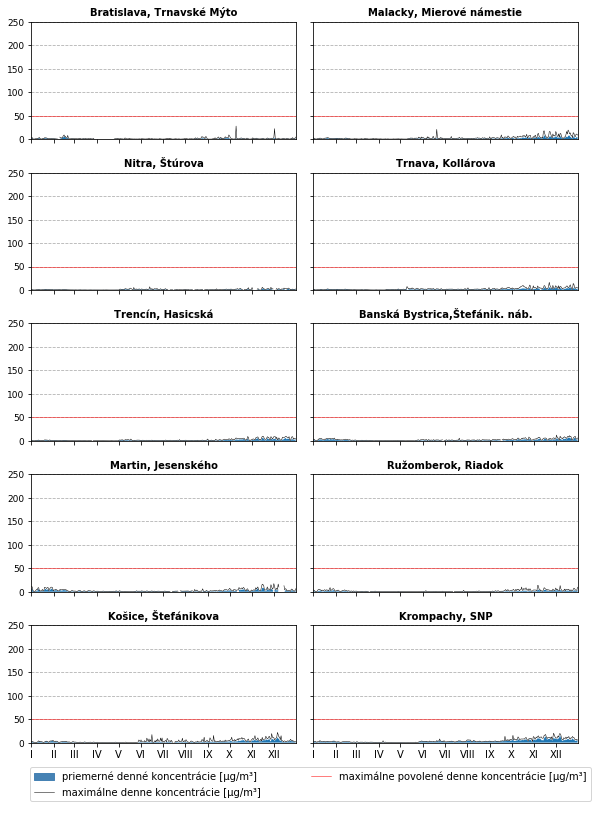

1 1 1 11


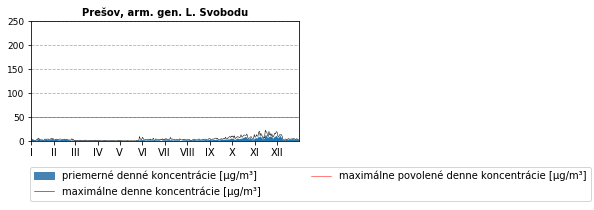

In [5]:
if __name__=="__main__":
    print("assa")
    carymarygrafy(10,250,0.2,50)
